In [5]:
import numpy as np
import os
import tifffile
from natsort import natsorted
import matplotlib.pyplot as plt

In [6]:
# Set the input directory path
input_dir = "D:/Temperature_images/RAW_2023-07-10/"
output_path = "D:/Temperature_images/RAW_2023-07-10/Stacks/"

# Create the output directory if it doesn't already exist
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Get a list of all TIFF files in the input directory
input_files = [f for f in os.listdir(input_dir) if f.endswith('.tiff')]
input_files = natsorted(input_files)
# Reshape array of input files
files_list = np.reshape(input_files, (-1, 1))
print(files_list)
# Initialize empty lists for the red and green stacks
red_stack = []
green_stack = []
blue_stack = []
raw_stack =[]

# Loop through each image file in the input directory
for file in input_files:
    # Load the image using tifffile
    img = tifffile.imread(os.path.join(input_dir, file))

    ### Set Crop dimension (OPTIONAL) ###
    img = img[1000:2000,1200:2200] 
    
    # Extract the red and green channels
    red_channel = img[1::2, 1::2]
    blue_channel = img[0::2, 0::2]
    green_channel_1 = img[0::2, 1::2]
    green_channel_2 = img[1::2, 0::2]
    green_channel = np.add(green_channel_1, green_channel_2) // 2
     # Add the red and green channels to the corresponding stacks
    blue_stack.append(blue_channel)
    red_stack.append(red_channel)
    green_stack.append(green_channel)
    raw_stack.append(img)

# Stack the red and green channel lists along the third axis to create the corresponding stacks
red_stack = np.stack(red_stack, axis=0)
green_stack = np.stack(green_stack, axis=0)
blue_stack =np.stack(blue_stack, axis=0)

# Save the red and green stacks to separate TIFF files
tifffile.imwrite(os.path.join(output_path, "stacked_red_channel.tiff"), red_stack)
tifffile.imwrite(os.path.join(output_path, "stacked_green_channel.tiff"), green_stack)
tifffile.imwrite(os.path.join(output_path, "stacked_blue_channel.tiff"), blue_stack)




[['RAW_2023-07-10_2,7.tiff']
 ['RAW_2023-07-10_3,17.tiff']
 ['RAW_2023-07-10_3,95.tiff']
 ['RAW_2023-07-10_4,18.tiff']
 ['RAW_2023-07-10_4,28.tiff']
 ['RAW_2023-07-10_4,36.tiff']
 ['RAW_2023-07-10_4,57.tiff']
 ['RAW_2023-07-10_5,36.tiff']
 ['RAW_2023-07-10_7,01.tiff']
 ['RAW_2023-07-10_8,41.tiff']
 ['RAW_2023-07-10_9,76.tiff']
 ['RAW_2023-07-10_10,99.tiff']
 ['RAW_2023-07-10_12,10.tiff']
 ['RAW_2023-07-10_13,09.tiff']
 ['RAW_2023-07-10_13,96.tiff']
 ['RAW_2023-07-10_14,75.tiff']
 ['RAW_2023-07-10_15,44.tiff']
 ['RAW_2023-07-10_16,06.tiff']
 ['RAW_2023-07-10_16,62.tiff']
 ['RAW_2023-07-10_17,12.tiff']
 ['RAW_2023-07-10_17,56.tiff']
 ['RAW_2023-07-10_17,98.tiff']
 ['RAW_2023-07-10_18,36.tiff']
 ['RAW_2023-07-10_18,72.tiff']
 ['RAW_2023-07-10_19,04.tiff']
 ['RAW_2023-07-10_19,33.tiff']
 ['RAW_2023-07-10_19,60.tiff']
 ['RAW_2023-07-10_19,85.tiff']
 ['RAW_2023-07-10_20,08.tiff']
 ['RAW_2023-07-10_20,28.tiff']
 ['RAW_2023-07-10_20,47.tiff']
 ['RAW_2023-07-10_20,64.tiff']
 ['RAW_2023-07-10_20

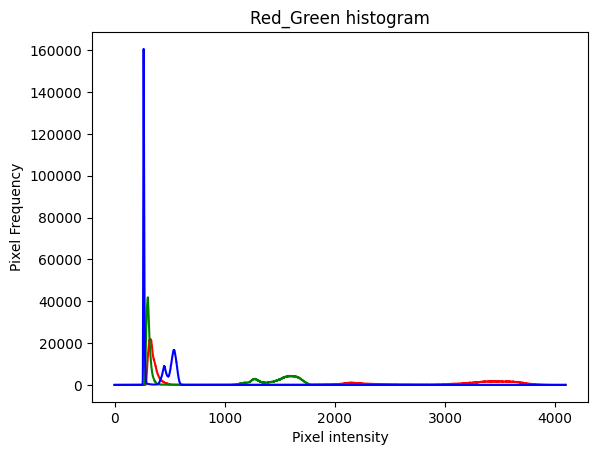

Histogram Succes
Number of red pixels: 3082560
Number of green pixels: 3082560


In [19]:
hist_image = raw_stack[0]
#hist_image = hist_image[1000:2000, 2000:3000]

#tifffile.imwrite('/home/martin/Desktop/raw_image.tiff', hist_image) #Save RAW image

#Get color channels in bayer order (BGGR)
red = hist_image[1::2,1::2]
green1 = hist_image[0::2,1::2]
green2 = hist_image[1::2,0::2]
green = np.add(green1,green2)/2
blue = hist_image[0::2,0::2]


#Make histogram for red and green channel # Set camera controls to have good pixel saturation
Colors=("red","green","blue")
Channel_ids=(red,green,blue)
for channel_id, c in zip(Channel_ids,Colors):
    histogram, bin_edges=np.histogram(channel_id,bins=4095, range=(0,4095))
    plt.plot(bin_edges[0:-1],histogram,color=c)
plt.title("Red_Green histogram")
plt.xlabel("Pixel intensity")
plt.ylabel("Pixel Frequency")
plt.show()
print("Histogram Succes")

# Count number of red and green pixels
num_red_pixels = np.count_nonzero(red)
num_green_pixels = np.count_nonzero(green)

print("Number of red pixels:", num_red_pixels)
print("Number of green pixels:", num_green_pixels)